In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [108]:
mpl.style.use("seaborn-v0_8-deep")
mpl.rcParams["figure.figsize"] = (20, 5)
mpl.rcParams["figure.dpi"] = 100
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

## Feature Importance and Selection using Random Forest

**Introduction**:
When dealing with high-dimensional datasets, understanding which features contribute the most to model performance can be crucial. Random Forest, a versatile and ensemble-based machine learning algorithm, offers a built-in mechanism to rank features based on their importance.

**Dataset**:
The data is sourced from a solar forecasting project, containing DNI (Direct Normal Irradiance) values along with various other features. These data points are recorded at 10-minute intervals over a span of 5 years, from January 2016 to December 2020.

**Steps Undertaken**:

1. **Data Loading and Splitting**:
   - The dataset was loaded from a saved pickle file.
   - An 80-20 train-test split was performed, ensuring that 80% of the data is used for model training and the remaining 20% for evaluation.

2. **Random Forest on All Features**:
   - A Random Forest regressor was trained on the entire set of features in the training data.
   - The model's performance was then evaluated on the test set using Mean Absolute Error (MAE) as the metric.

3. **Feature Importance Extraction**:
   - Leveraging the Random Forest model, feature importances were extracted, which provides a score for each feature, indicating its relevance in predicting the target variable.
   - Features were ranked based on their importance scores.

4. **Model Training with Top Features**:
   - The top 10 features, as determined by their importance scores, were selected.
   - A new Random Forest regressor was trained using only these top 10 features.
   - The model's performance with the reduced feature set was then evaluated and compared to the original full feature set.



In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

print("Loading data...")
# Load your data (replace with your file path)
data = pd.read_pickle(
    "D:\\Projects\\Solar Forcasting\\Processed Data\\Pickle files\\feature_engineered_data.pkl"
)

# Split the data (80% train, 20% test)
print("Splitting data...")
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Separate the target variable 'DNI' and features
X_train = train_data.drop(columns=["DNI"])
y_train = train_data["DNI"]
X_test = test_data.drop(columns=["DNI"])
y_test = test_data["DNI"]

# Fit a Random Forest model to the training data
print("Training Random Forest on original features...")
rf_model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
original_mae = mean_absolute_error(y_test, rf_model.predict(X_test))
print(f"Mean Absolute Error with all features: {original_mae:.2f}")

# Retrieve the feature importances
print("Retrieving feature importances...")
feature_importances = rf_model.feature_importances_

# Rank the features based on their importances
features_df = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": feature_importances}
)
sorted_features_df = features_df.sort_values(by="Importance", ascending=False)

# Print out the top 10 features
print("Top 10 features based on importance:")
print(sorted_features_df.head(10))

# Select the top 10 features
selected_features = sorted_features_df["Feature"].head(10).tolist()

# Train and evaluate the model using only the top 10 features
print("Training Random Forest on selected features...")
rf_model_selected = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
rf_model_selected.fit(X_train[selected_features], y_train)

selected_mae = mean_absolute_error(
    y_test, rf_model_selected.predict(X_test[selected_features])
)
print(f"Mean Absolute Error with selected features: {selected_mae:.2f}")

print("Done!")

Loading data...
Splitting data...
Training Random Forest on original features...


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

Mean Absolute Error with all features: 2.02
Retrieving feature importances...
Top 10 features based on importance:
                     Feature  Importance
15       Sqrt_Sum_of_Squares    0.920205
12                     pca_2    0.048460
50   DNI_freq_1.429_Hz_ws_14    0.012474
120                  cluster    0.005733
7             Wind Direction    0.004733
45                   DNI_pse    0.003950
49   DNI_freq_1.071_Hz_ws_14    0.002074
44         DNI_freq_weighted    0.000372
47   DNI_freq_0.357_Hz_ws_14    0.000302
46     DNI_freq_0.0_Hz_ws_14    0.000259
Training Random Forest on selected features...


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

Mean Absolute Error with selected features: 2.59
Done!


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


C:\Users\user\AppData\Local\Temp\ipykernel_7884\2600281489.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


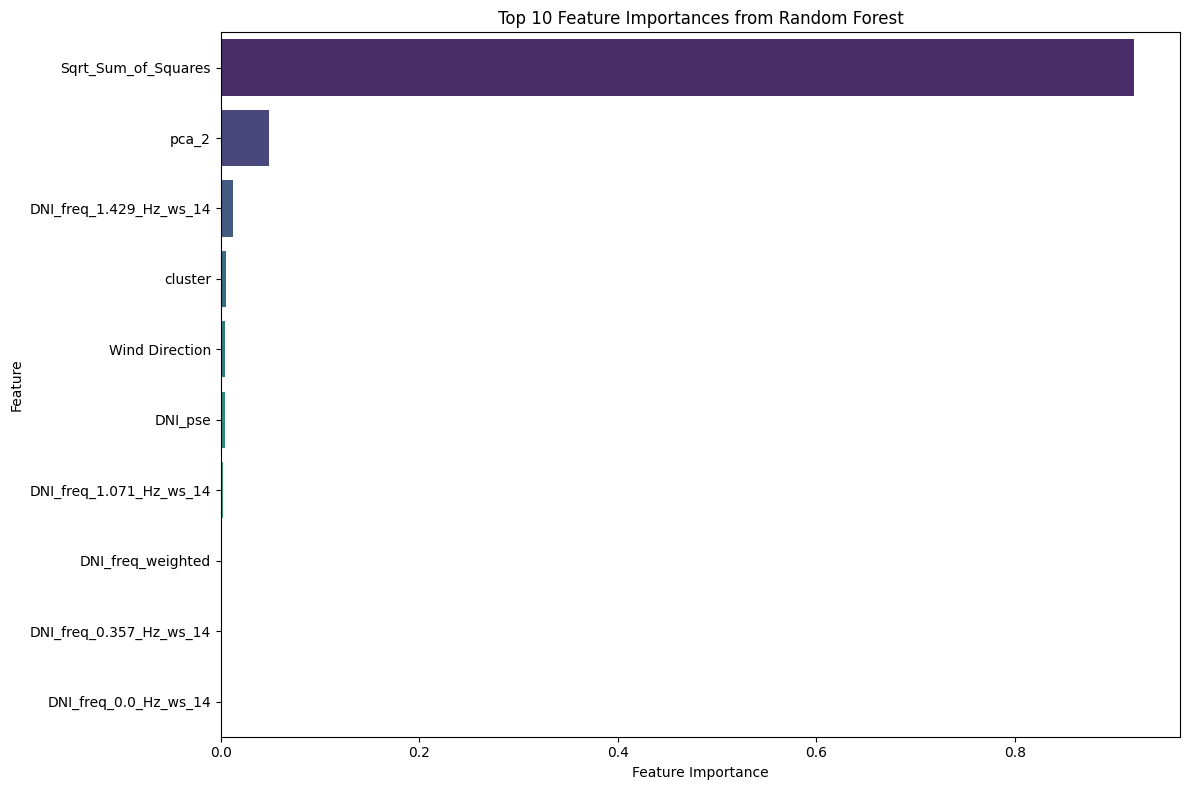

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data from the provided results
features = [
    "Sqrt_Sum_of_Squares",
    "pca_2",
    "DNI_freq_1.429_Hz_ws_14",
    "cluster",
    "Wind Direction",
    "DNI_pse",
    "DNI_freq_1.071_Hz_ws_14",
    "DNI_freq_weighted",
    "DNI_freq_0.357_Hz_ws_14",
    "DNI_freq_0.0_Hz_ws_14",
]
importances = [
    0.920205,
    0.048460,
    0.012474,
    0.005733,
    0.004733,
    0.003950,
    0.002074,
    0.000372,
    0.000302,
    0.000259,
]

# Creating the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Top 10 Feature Importances from Random Forest")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

Trained with 1 features. MAE: 51.57


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

Trained with 2 features. MAE: 22.55


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

Trained with 3 features. MAE: 11.72


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

Trained with 4 features. MAE: 8.78


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

Trained with 5 features. MAE: 4.86


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

Trained with 6 features. MAE: 3.82


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

Trained with 7 features. MAE: 3.54


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

Trained with 8 features. MAE: 2.95


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

Trained with 9 features. MAE: 2.81


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

Trained with 10 features. MAE: 2.77


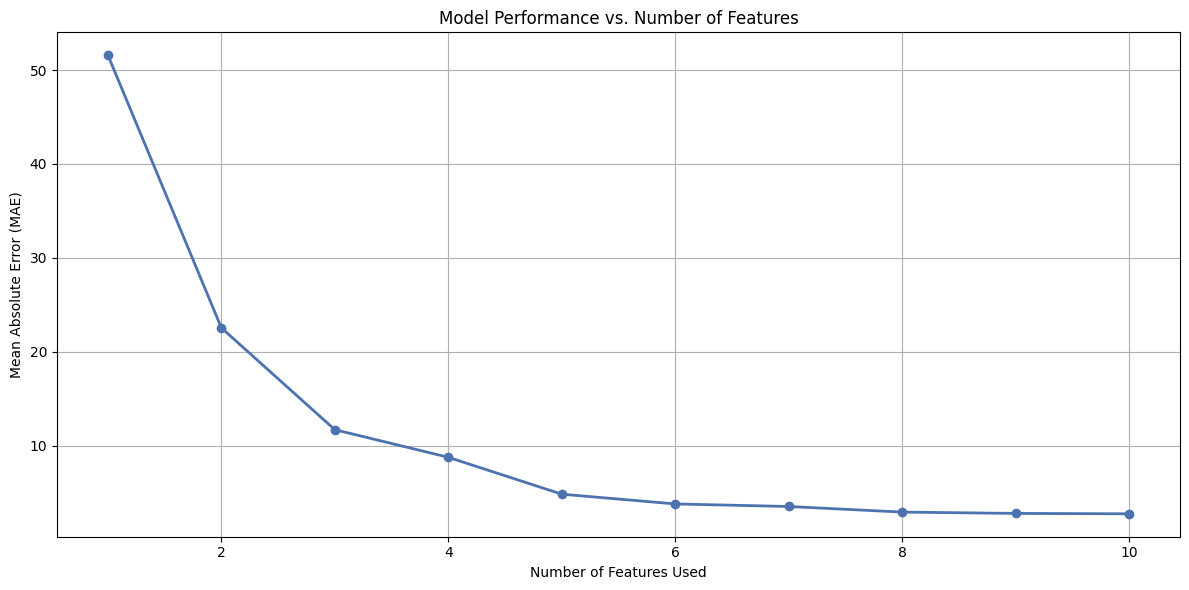

In [110]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Your data loading and preprocessing steps here...

# Ranked features and importances from previous steps
features = [
    "Sqrt_Sum_of_Squares",
    "pca_2",
    "DNI_freq_1.429_Hz_ws_14",
    "cluster",
    "Wind Direction",
    "DNI_pse",
    "DNI_freq_1.071_Hz_ws_14",
    "DNI_freq_weighted",
    "DNI_freq_0.357_Hz_ws_14",
    "DNI_freq_0.0_Hz_ws_14",
]
# ... add all other features in the order of importance

# Lists to store results
num_features_used = []
mae_scores = []

# Iteratively train model and evaluate performance
for i in range(1, len(features) + 1):
    selected_features = features[:i]

    rf = RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42)
    rf.fit(X_train[selected_features], y_train)

    predictions = rf.predict(X_test[selected_features])
    mae = mean_absolute_error(y_test, predictions)

    num_features_used.append(i)
    mae_scores.append(mae)
    print(f"Trained with {i} features. MAE: {mae:.2f}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(num_features_used, mae_scores, marker="o")
plt.title("Model Performance vs. Number of Features")
plt.xlabel("Number of Features Used")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

Trained with 1 features. R^2: 0.90


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

Trained with 2 features. R^2: 0.98


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

Trained with 3 features. R^2: 0.99


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

Trained with 4 features. R^2: 1.00


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

Trained with 5 features. R^2: 1.00


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

Trained with 6 features. R^2: 1.00


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

Trained with 7 features. R^2: 1.00


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

Trained with 8 features. R^2: 1.00


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

Trained with 9 features. R^2: 1.00


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

Trained with 10 features. R^2: 1.00


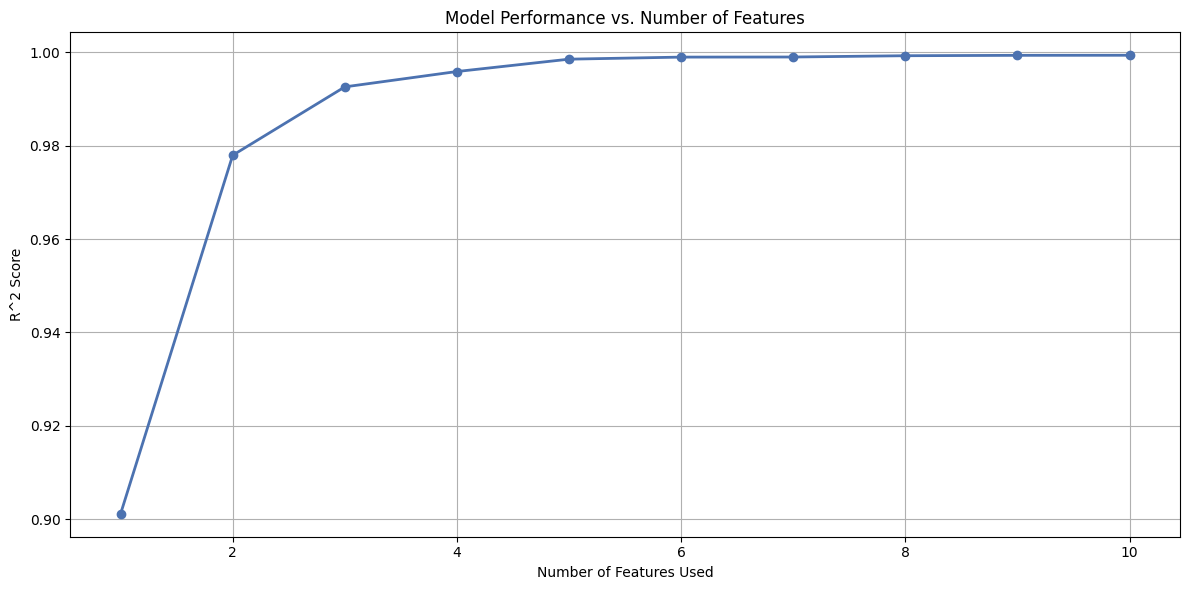

In [111]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Your data loading and preprocessing steps here...

# Ranked features and importances from previous steps
features = [
    "Sqrt_Sum_of_Squares",
    "pca_2",
    "DNI_freq_1.429_Hz_ws_14",
    "cluster",
    "Wind Direction",
    "DNI_pse",
    "DNI_freq_1.071_Hz_ws_14",
    "DNI_freq_weighted",
    "DNI_freq_0.357_Hz_ws_14",
    "DNI_freq_0.0_Hz_ws_14",
]
# ... add all other features in the order of importance

# Lists to store results
num_features_used = []
r2_scores = []

# Iteratively train model and evaluate performance
for i in range(1, len(features) + 1):
    selected_features = features[:i]

    rf = RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42)
    rf.fit(X_train[selected_features], y_train)

    predictions = rf.predict(X_test[selected_features])
    r2 = r2_score(y_test, predictions)

    num_features_used.append(i)
    r2_scores.append(r2)
    print(f"Trained with {i} features. R^2: {r2:.2f}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(num_features_used, r2_scores, marker="o")
plt.title("Model Performance vs. Number of Features")
plt.xlabel("Number of Features Used")
plt.ylabel("R^2 Score")
plt.grid(True)
plt.tight_layout()
plt.show()

## Facebook Prophet Time Series Forecasting

**Introduction**:
Facebook Prophet is a tool designed for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

**Data**:
The dataset contains DNI (Direct Normal Irradiance) values recorded every 10 minutes over a span of 5 years from January 2016 to December 2020. 

**Pre-processing**:
1. The data was separated into training (2016-2019) and testing (2020) sets.
2. The dataset was converted into the format suitable for Prophet (with columns named 'ds' for datetime and 'y' for the value to predict).
3. For better visualization and understanding, data was resampled to daily averages from the original 10-minute intervals.

**Model Training**:
1. We performed hyperparameter tuning using Optuna to find the best parameters for Prophet. This included tuning the seasonality, changepoints, and other related parameters.
2. With the best parameters obtained, the Prophet model was trained on the training data.

**Evaluation**:
1. We predicted the DNI values for both the training and testing periods.
2. The performance of the model was evaluated using metrics like MSE, RMSE, MAE, and R^2. 
3. Visualization of actual vs. predicted values was done for both training and testing datasets. The plots gave a clear representation of how close the predictions were to the actual values.




In [112]:
from prophet import Prophet


data = pd.read_pickle(
    "D:\\Projects\\Solar Forcasting\\Processed Data\\Pickle files\\feature_engineered_data.pkl"
)

# Select 'DNI' and the top features as regressors
selected_regressors = [
    "Sqrt_Sum_of_Squares",
    "pca_2",
    "DNI_freq_1.429_Hz_ws_14",
    "cluster",
    "Wind Direction",
    "DNI_pse",
    "DNI_freq_1.071_Hz_ws_14",
    "DNI_freq_weighted",
    "DNI_freq_0.357_Hz_ws_14",
    "DNI_freq_0.0_Hz_ws_14",
]

prophet_data = data[["DNI"] + selected_regressors].reset_index()
prophet_data.rename(columns={"datetime": "ds", "DNI": "y"}, inplace=True)

# Split data into train and test based on the year
train_prophet_data = prophet_data[prophet_data["ds"].dt.year < 2020]
test_prophet_data = prophet_data[prophet_data["ds"].dt.year == 2020]

In [113]:
# Initialize Prophet model
prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=True)

# Adding regressors
for feature in selected_regressors:
    prophet_model.add_regressor(feature)

# Fit the model
prophet_model.fit(train_prophet_data)

16:52:10 - cmdstanpy - INFO - Chain [1] start processing
16:57:15 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
import optuna
from sklearn.metrics import r2_score


def objective(trial):
    # Define hyperparameters space
    params = {
        "changepoint_prior_scale": trial.suggest_float(
            "changepoint_prior_scale", 0.001, 0.5
        ),
        "seasonality_prior_scale": trial.suggest_float(
            "seasonality_prior_scale", 0.01, 10
        ),
        "holidays_prior_scale": trial.suggest_float("holidays_prior_scale", 0.01, 10),
        "changepoint_range": trial.suggest_float("changepoint_range", 0.8, 0.95),
        "yearly_seasonality": trial.suggest_categorical(
            "yearly_seasonality", [True, False, 10, 20]
        ),
        "weekly_seasonality": trial.suggest_categorical(
            "weekly_seasonality", [True, False, 10, 20]
        ),
        "daily_seasonality": trial.suggest_categorical(
            "daily_seasonality", [True, False, 10, 20]
        ),
        "seasonality_mode": trial.suggest_categorical(
            "seasonality_mode", ["additive", "multiplicative"]
        ),
    }

    # Initialize model with current hyperparameters
    model = Prophet(**params)
    for feature in selected_regressors:
        model.add_regressor(feature)

    model.fit(train_prophet_data)

    # Make predictions and evaluate
    forecast = model.predict(test_prophet_data)
    # Check for nan or infinite values in the forecast
    if forecast["yhat"].isnull().any():
        return float("-inf")
    r2 = r2_score(test_prophet_data["y"], forecast["yhat"])

    return r2  # We want to maximize R^2, so no need to make it negative


study = optuna.create_study(
    direction="maximize"
)  # Change direction to "maximize" for R^2
study.optimize(objective, n_trials=10)  # Adjust based on computational resources

best_params = study.best_params

[I 2023-10-30 12:15:27,784] A new study created in memory with name: no-name-64b3f83b-14d4-4f0d-aa89-eed6f81dc9a7


12:17:35 - cmdstanpy - INFO - Chain [1] start processing
12:27:21 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_

In [114]:
# Best parameters from the optimization
best_params = {
    "changepoint_prior_scale": 0.049716545435140175,
    "seasonality_prior_scale": 8.222591715155207,
    "holidays_prior_scale": 1.09552284029919,
    "changepoint_range": 0.824089522757119,
    "yearly_seasonality": True,
    "weekly_seasonality": 10,
    "daily_seasonality": True,
    "seasonality_mode": "multiplicative",
}

# Initialize model with best parameters
final_model = Prophet(**best_params)
for feature in selected_regressors:
    final_model.add_regressor(feature)

# Fit the model on training data
final_model.fit(train_prophet_data)

# Make forecasts on the test data
forecast = final_model.predict(test_prophet_data)

16:58:04 - cmdstanpy - INFO - Chain [1] start processing
17:01:53 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


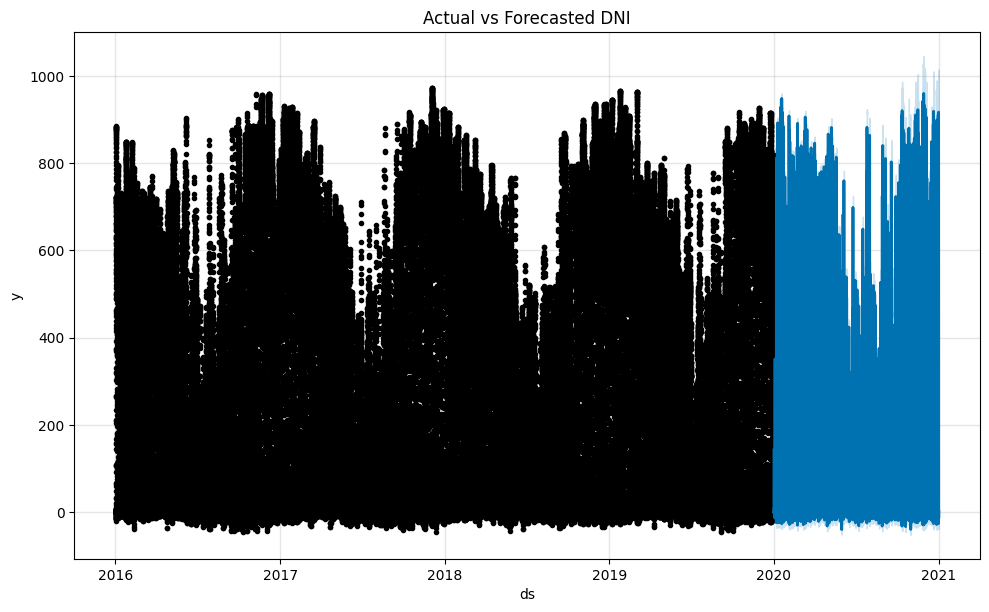

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0

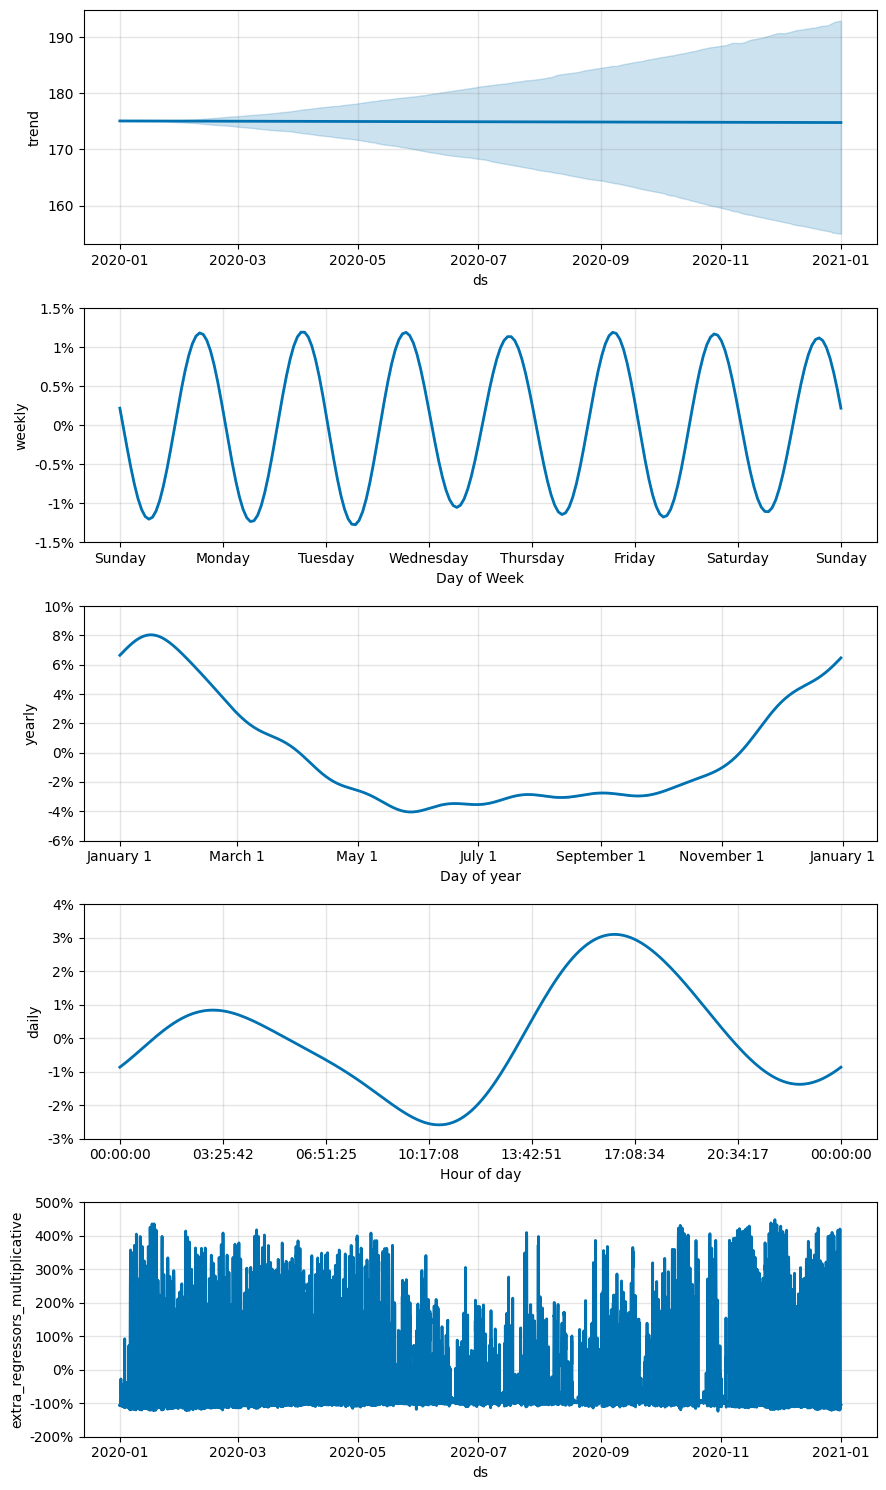

In [115]:
import matplotlib.pyplot as plt

# Plot the forecast
fig1 = final_model.plot(forecast)
plt.title("Actual vs Forecasted DNI")
plt.show()

# Plot the components of the forecast
fig2 = final_model.plot_components(forecast)
plt.show()

In [116]:
import matplotlib.pyplot as plt

# Initialize model with best parameters
final_model = Prophet(uncertainty_samples=0, **best_params)
for feature in selected_regressors:
    final_model.add_regressor(feature)

# Fit the model on training data
final_model.fit(train_prophet_data)

# Make forecasts on the test data
forecast_train = final_model.predict(train_prophet_data)

17:03:53 - cmdstanpy - INFO - Chain [1] start processing
17:07:48 - cmdstanpy - INFO - Chain [1] done processing


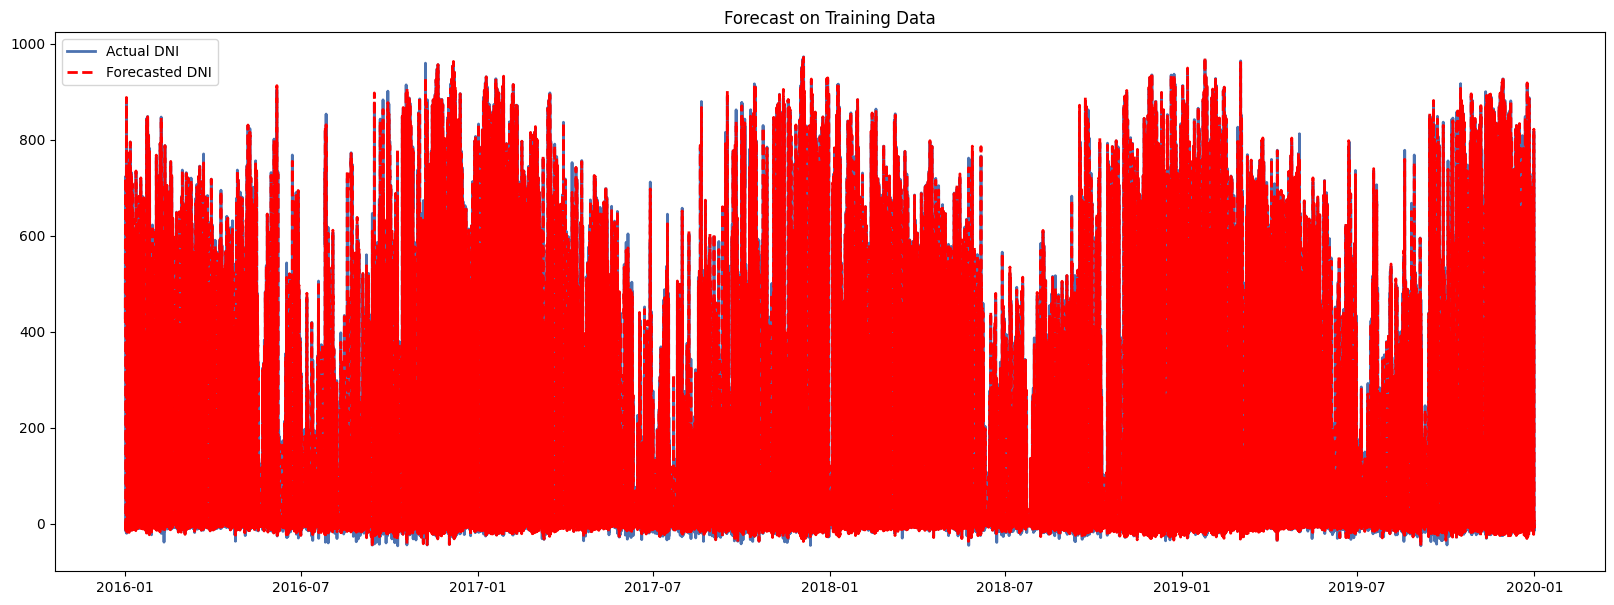

In [117]:
plt.figure(figsize=(20, 7))
plt.plot(train_prophet_data["ds"], train_prophet_data["y"], label="Actual DNI")
plt.plot(
    forecast_train["ds"],
    forecast_train["yhat"],
    label="Forecasted DNI",
    color="red",
    linestyle="--",
)
plt.title("Forecast on Training Data")
plt.legend()
plt.show()

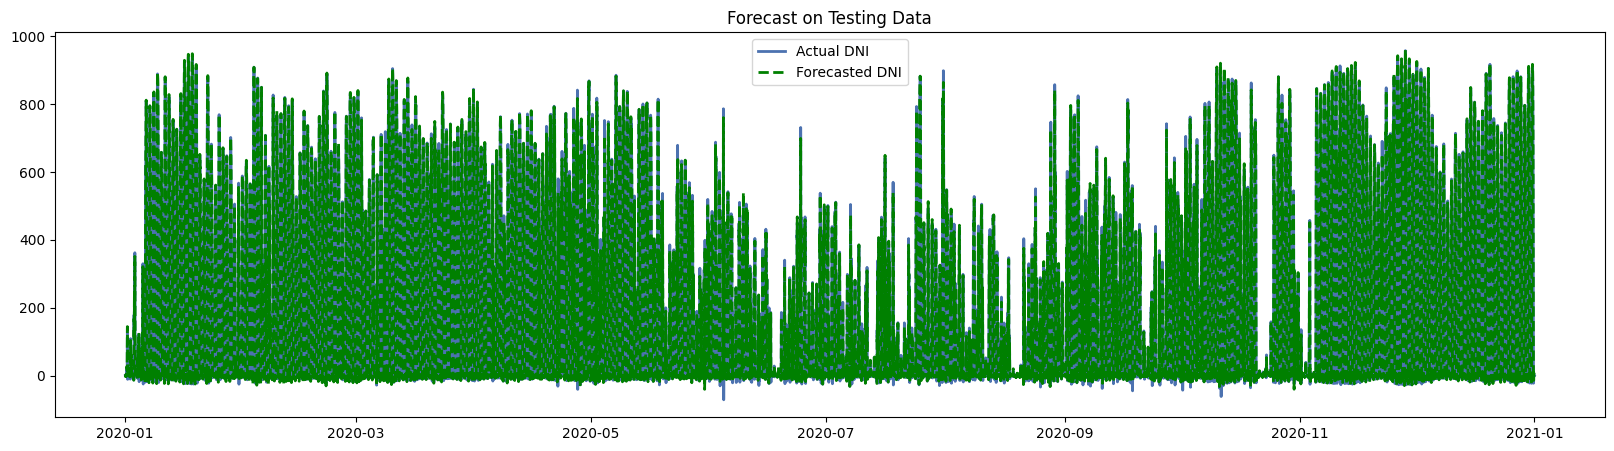

In [118]:
forecast_test = final_model.predict(test_prophet_data)
# Plot the forecast on testing data
plt.figure(figsize=(20, 5))
plt.plot(test_prophet_data["ds"], test_prophet_data["y"], label="Actual DNI")
plt.plot(
    forecast_test["ds"],
    forecast_test["yhat"],
    label="Forecasted DNI",
    color="green",
    linestyle="--",
)
plt.title("Forecast on Testing Data")
plt.legend()
plt.show()

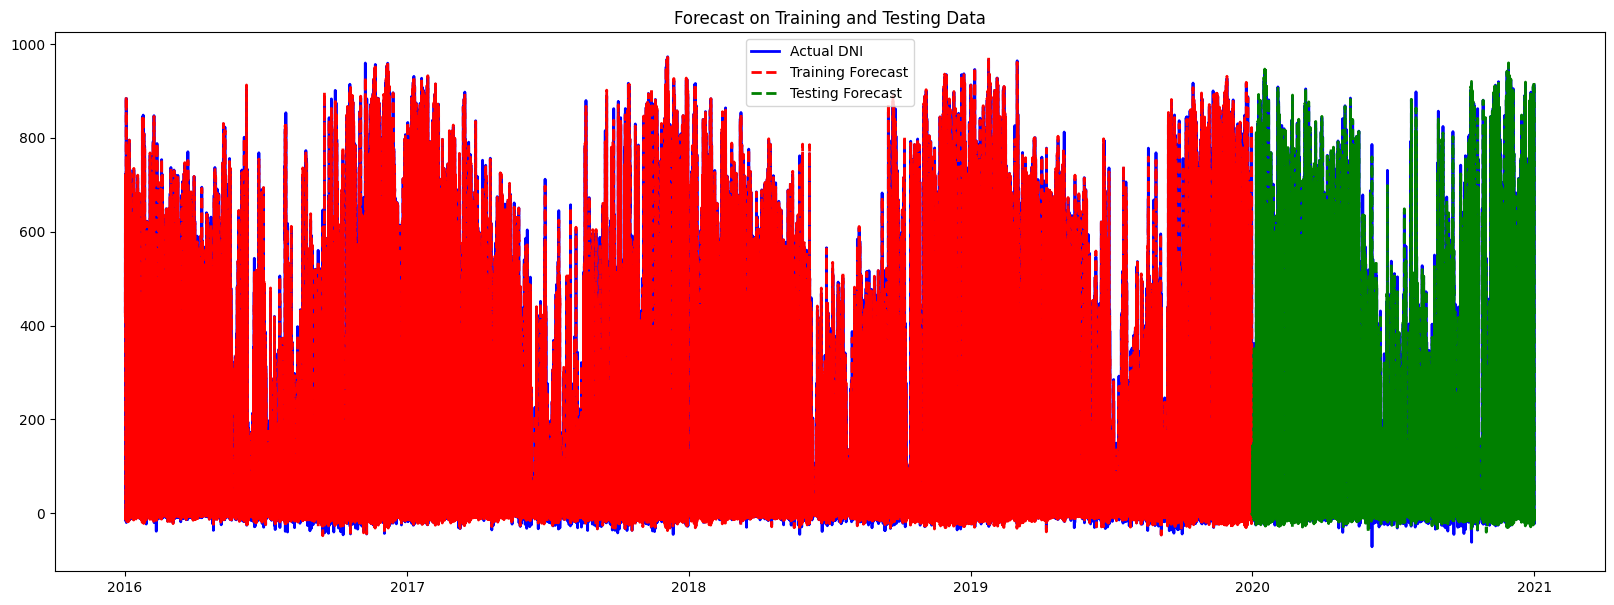

In [52]:
# Combine forecasts
forecast_combined = pd.concat([forecast_train, forecast_test])

# Plot the combined forecast
plt.figure(figsize=(20, 7))
# Actual DNI for both training and testing
plt.plot(prophet_data["ds"], prophet_data["y"], label="Actual DNI", color="blue")

# Forecasted DNI for training set
plt.plot(
    forecast_train["ds"],
    forecast_train["yhat"],
    label="Training Forecast",
    color="red",
    linestyle="--",
)

# Forecasted DNI for testing set
plt.plot(
    forecast_test["ds"],
    forecast_test["yhat"],
    label="Testing Forecast",
    color="green",
    linestyle="--",
)

plt.title("Forecast on Training and Testing Data")
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Metrics for Training Dataset
mse_train = mean_squared_error(train_prophet_data["y"], forecast_train["yhat"])
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(train_prophet_data["y"], forecast_train["yhat"])
r2_train = r2_score(train_prophet_data["y"], forecast_train["yhat"])

# Metrics for Testing Dataset
mse_test = mean_squared_error(test_prophet_data["y"], forecast_test["yhat"])
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(test_prophet_data["y"], forecast_test["yhat"])
r2_test = r2_score(test_prophet_data["y"], forecast_test["yhat"])
# Creating a DataFrame to hold the metrics
results_df = pd.DataFrame(
    {
        "Dataset": ["Training", "Testing"],
        "MSE": [mse_train, mse_test],
        "RMSE": [rmse_train, rmse_test],
        "MAE": [mae_train, mae_test],
        "R^2": [r2_train, r2_test],
    }
)
reshaped_df = results_df.melt(
    id_vars=["Dataset"],
    value_vars=["MSE", "RMSE", "MAE", "R^2"],
    var_name="Metric",
    value_name="Value",
)

# Pivot the reshaped DataFrame to get the desired format
final_df = reshaped_df.pivot(
    index="Metric", columns="Dataset", values="Value"
).reset_index()

# Display the final DataFrame
print(final_df)

Dataset Metric    Testing   Training
0          MAE   6.256674   5.720230
1          MSE  95.821688  81.613365
2         RMSE   9.788855   9.034012
3          R^2   0.998688   0.998799


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


In [59]:
final_df

Dataset,Metric,Testing,Training
0,MAE,6.256674,5.720230
1,MSE,95.821688,81.613365
2,RMSE,9.788855,9.034012
3,R^2,0.998688,0.998799


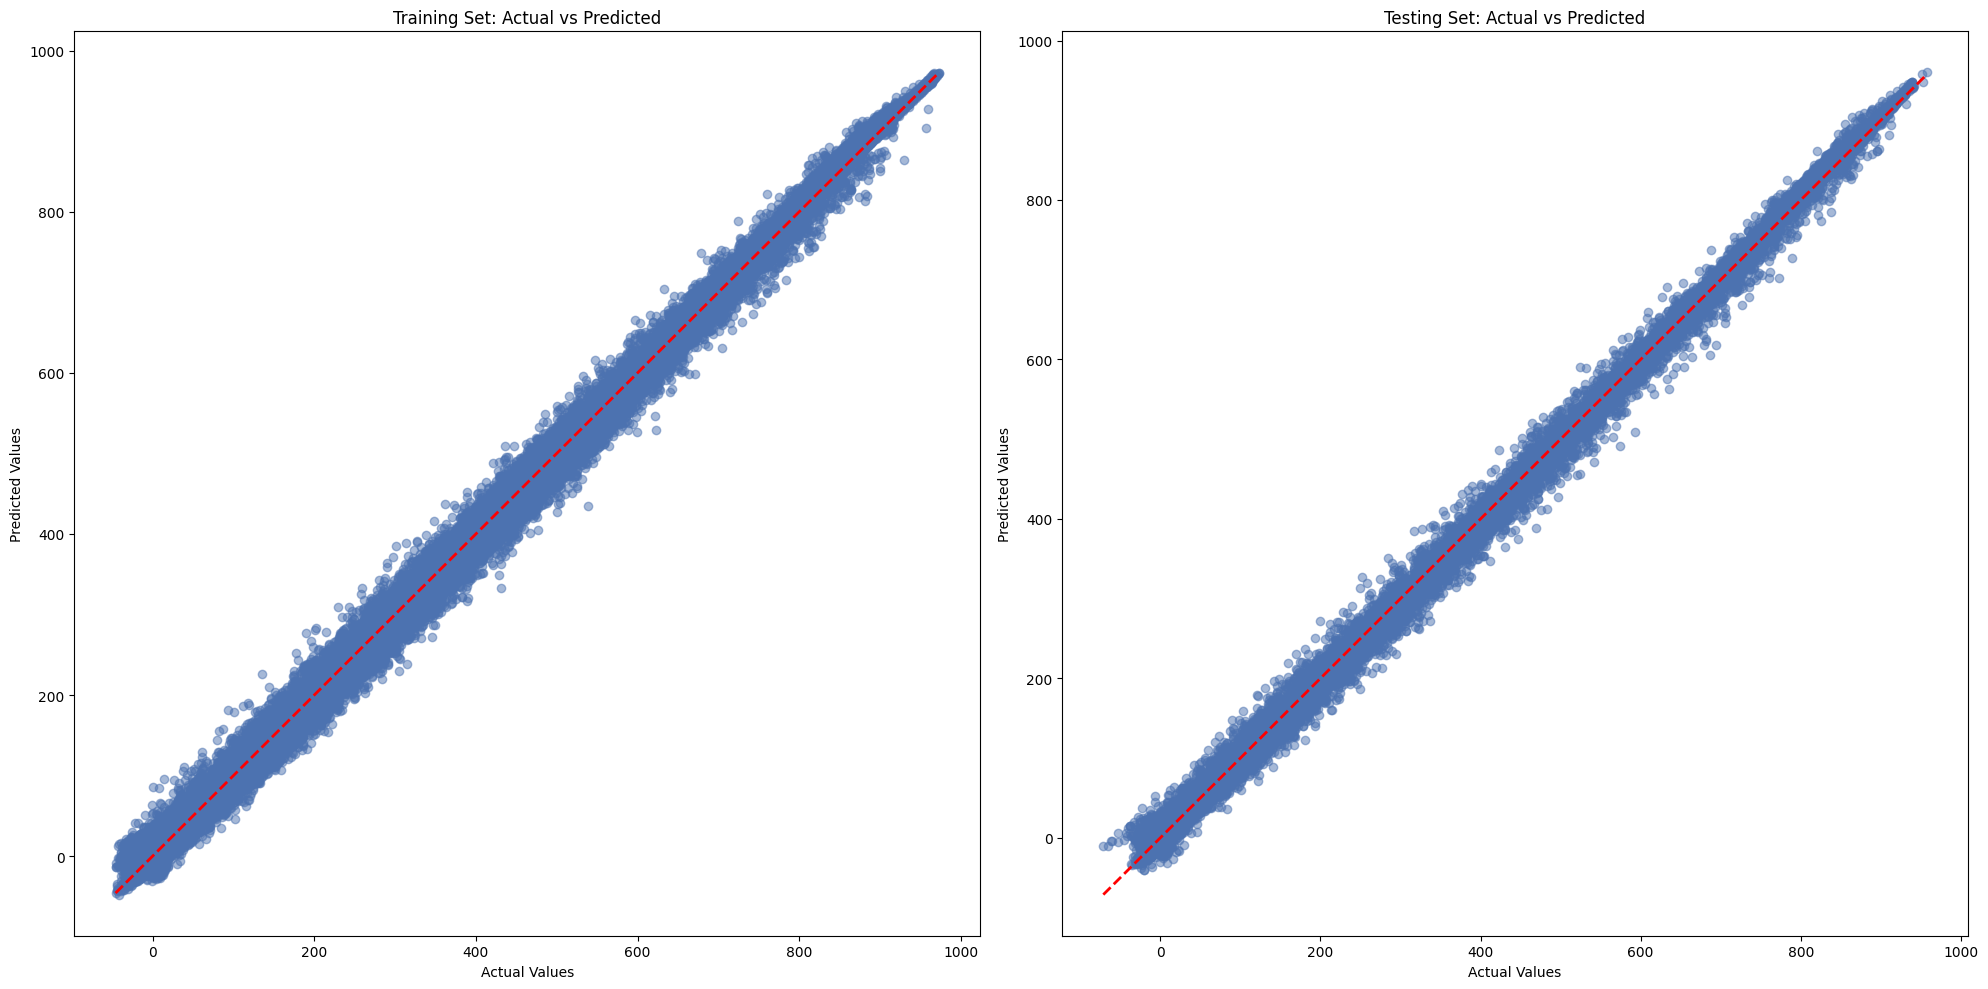

In [71]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plotting for Training Set
ax1.scatter(train_prophet_data["y"], forecast_train["yhat"], alpha=0.5)
ax1.plot(
    [train_prophet_data["y"].min(), train_prophet_data["y"].max()],
    [train_prophet_data["y"].min(), train_prophet_data["y"].max()],
    "r--",
)
ax1.set_title("Training Set: Actual vs Predicted")
ax1.set_xlabel("Actual Values")
ax1.set_ylabel("Predicted Values")

# Plotting for Testing Set
ax2.scatter(test_prophet_data["y"], forecast_test["yhat"], alpha=0.5)
ax2.plot(
    [test_prophet_data["y"].min(), test_prophet_data["y"].max()],
    [test_prophet_data["y"].min(), test_prophet_data["y"].max()],
    "r--",
)
ax2.set_title("Testing Set: Actual vs Predicted")
ax2.set_xlabel("Actual Values")
ax2.set_ylabel("Predicted Values")

plt.tight_layout()
plt.show()

In [81]:
# Resample actual data
y_actual_train_daily = train_prophet_data["y"].resample("D").mean()
y_actual_test_daily = test_prophet_data["y"].resample("D").mean()

In [ ]:
# Resample the forecast data
forecast_train_daily = forecast_train["yhat"].resample("D").mean()
forecast_test_daily = forecast_test["yhat"].resample("D").mean()

In [89]:
forecast_test
forecast_test_daily = forecast_test["yhat"].resample("D").mean()

ds
2016-01-01    334.704218
2016-01-02    300.186610
2016-01-03    212.890682
2016-01-04    180.250324
2016-01-05    222.074238
                 ...    
2019-12-27    130.924322
2019-12-28    109.358392
2019-12-29    220.537605
2019-12-30    184.331278
2019-12-31    264.144720
Freq: D, Name: yhat, Length: 1461, dtype: float64

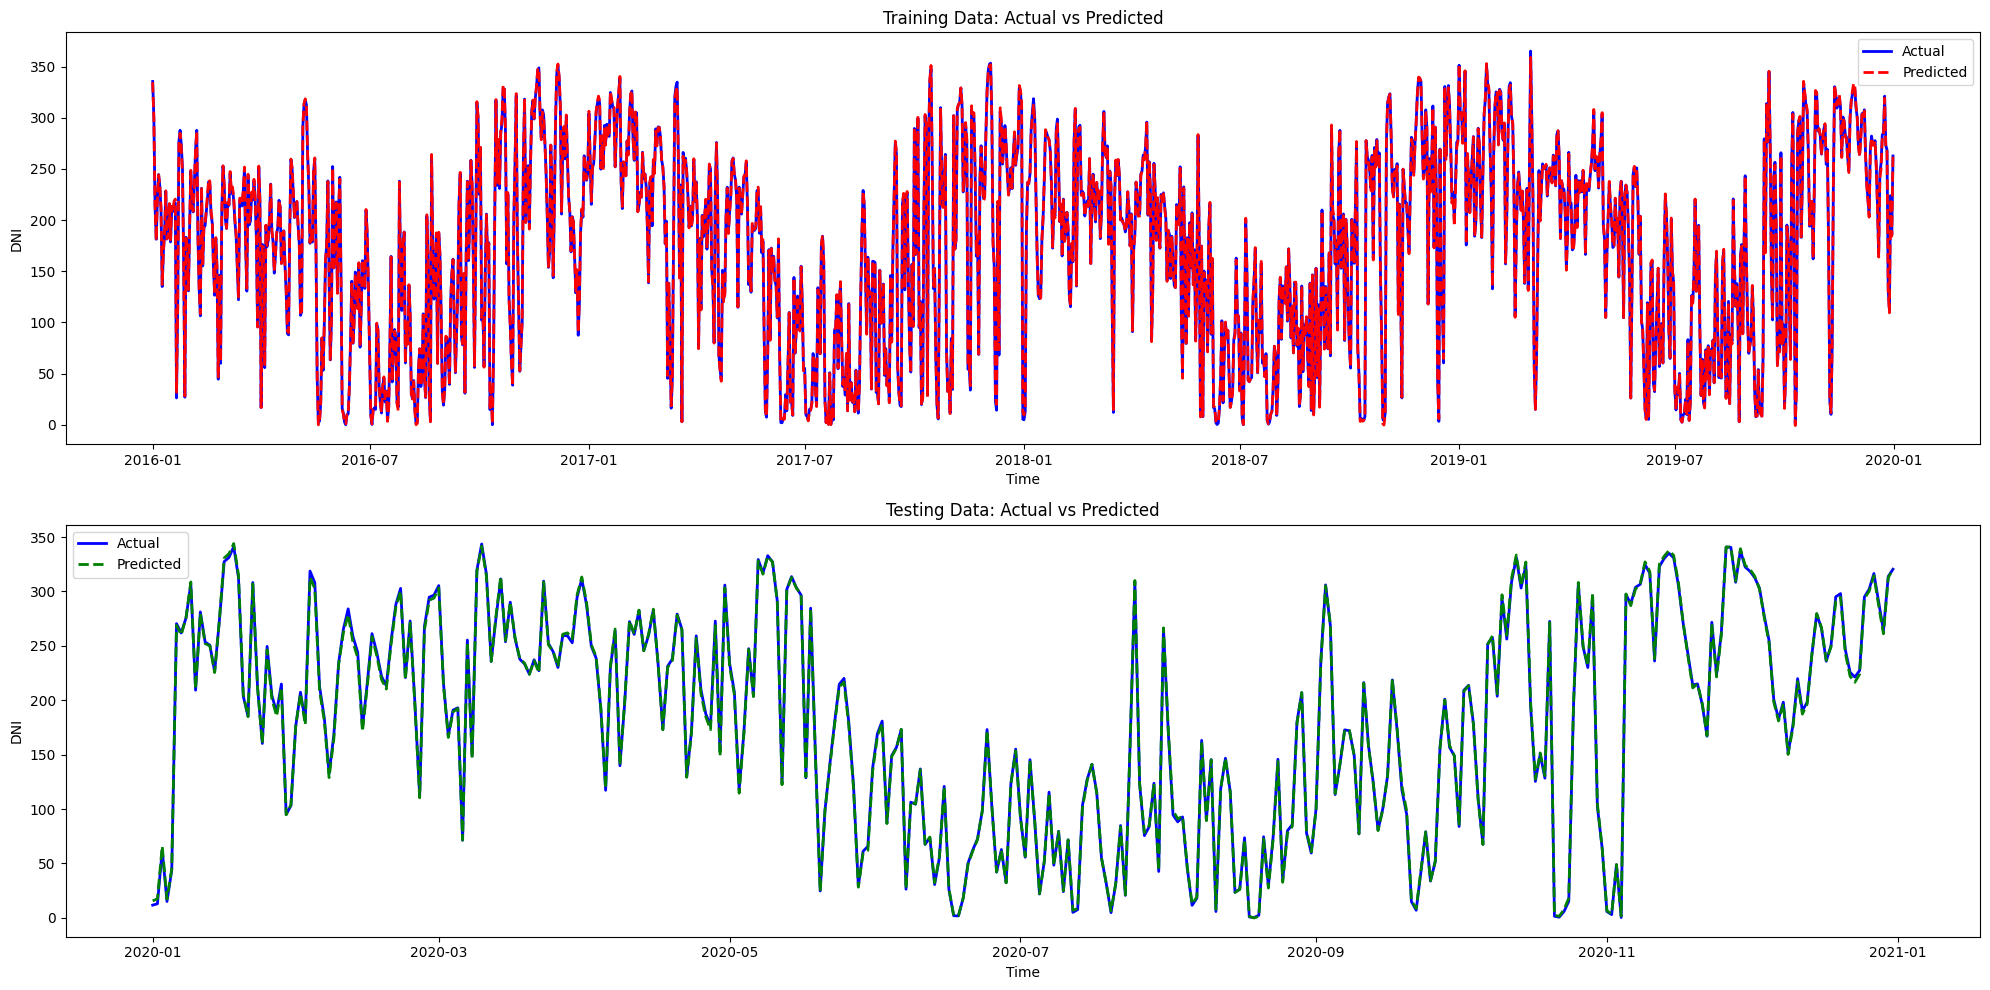

In [94]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

# Training Data
ax1.plot(y_actual_train_daily.index, y_actual_train_daily, label="Actual", color="blue")
ax1.plot(
    forecast_train_daily.index,
    forecast_train_daily,
    label="Predicted",
    color="red",
    linestyle="--",
)
ax1.set_title("Training Data: Actual vs Predicted")
ax1.set_xlabel("Time")
ax1.set_ylabel("DNI")
ax1.legend()

# Testing Data
ax2.plot(y_actual_test_daily.index, y_actual_test_daily, label="Actual", color="blue")
ax2.plot(
    forecast_test_daily.index,
    forecast_test_daily,
    label="Predicted",
    color="green",
    linestyle="--",
)
ax2.set_title("Testing Data: Actual vs Predicted")
ax2.set_xlabel("Time")
ax2.set_ylabel("DNI")
ax2.legend()

plt.tight_layout()
plt.show()

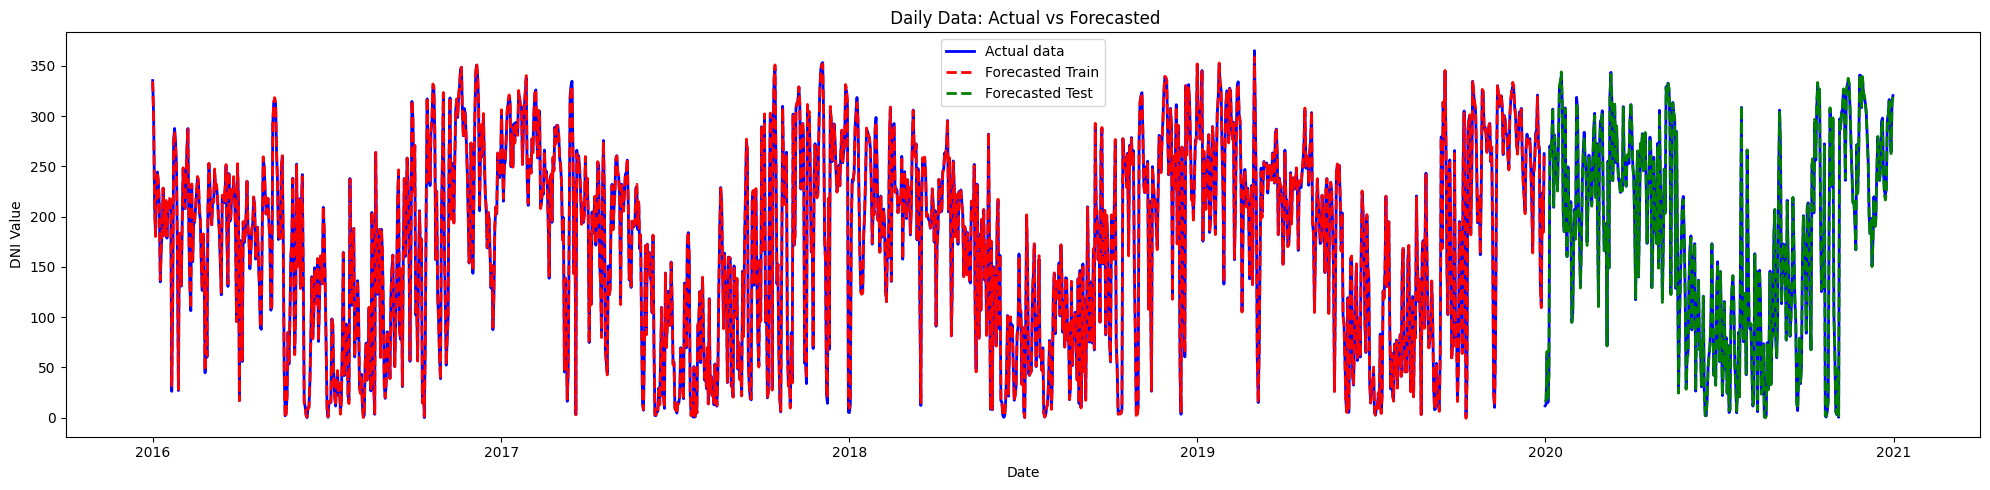

In [102]:
# Plotting
plt.figure(figsize=(20, 5))

# Plotting actual data
plt.plot(
    y_actual_train_daily.index, y_actual_train_daily, label="Actual data", color="blue"
)
plt.plot(y_actual_test_daily.index, y_actual_test_daily, color="blue")

# Plotting forecasted data
plt.plot(
    forecast_train_daily.index,
    forecast_train_daily,
    label="Forecasted Train",
    color="red",
    linestyle="--",
)
plt.plot(
    forecast_test_daily.index,
    forecast_test_daily,
    label="Forecasted Test",
    color="green",
    linestyle="--",
)

plt.title(" Daily Data: Actual vs Forecasted")
plt.xlabel("Date")
plt.ylabel("DNI Value")
plt.legend()
plt.tight_layout()
plt.show()